<a href="https://colab.research.google.com/github/msbeigi/gaussian-mixture-model-em-clustering/blob/main/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
np.set_printoptions(suppress=True)

In [1]:
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


In [4]:
def twod(row):
  raw_row=np.array(row.values.tolist())
  res=raw_row.reshape(-1,1)
  sc=StandardScaler()
  sc.fit(res)
  val=sc.transform(res)
  return val



rw_reshap1=twod(numerical_df.iloc[0])
rw_reshap2=twod(numerical_df.iloc[1])
euclidean_distances(rw_reshap1,rw_reshap2)

array([[0.00447177, 0.01490839, 0.01512901, 2.32088272],
       [0.00858239, 0.00185424, 0.00207486, 2.30782856],
       [0.01701795, 0.00658133, 0.00636071, 2.299393  ],
       [2.31637625, 2.30593962, 2.30571901, 0.0000347 ]])

In [13]:
std_clf=make_pipeline(StandardScaler(),KMeans(n_clusters=3))
kmeans=std_clf.fit(numerical_df)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

## KMeans Diagnosis
*   Elbow plot
*   Silhouettee analysis
*   Intercluster distance map




1.   Elbow plot


Scaling the data normalizes the distances between data points, making the clustering process more robust.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

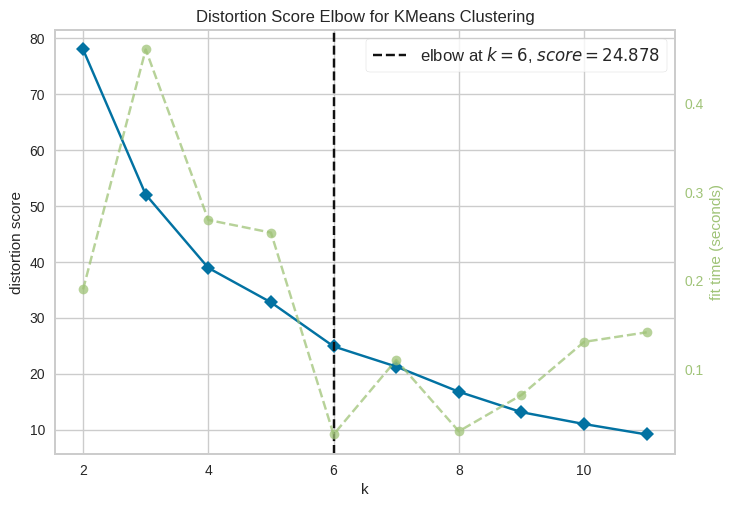

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
scal=StandardScaler()
scal.fit(numerical_df)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(scal.transform(numerical_df))
visualizer.poof()

### 2.  Yellowbrick blob

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

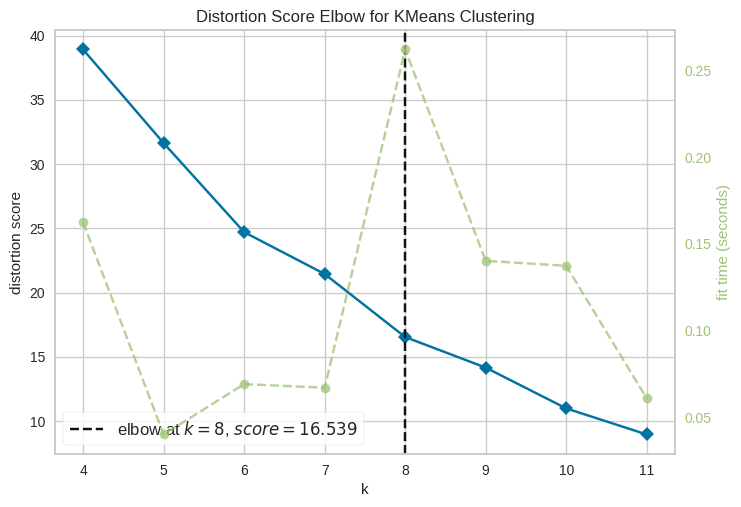

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.datasets import make_blobs
X,y= make_blobs(centers=8,n_features=12,shuffle=True,random_state=42)

vis=KElbowVisualizer(model, k=(4,12))
vis.fit(scal.transform(numerical_df))
vis.poof()

### 3.  Silhouettee Analysis
The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


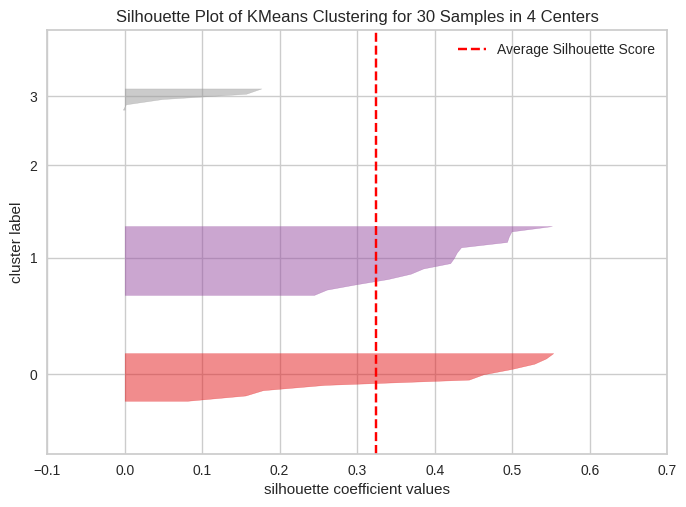

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
sil_vis=SilhouetteVisualizer(KMeans(4))
sil_vis.fit(scal.transform(numerical_df))
sil_vis.poof()

### 4.  Intercluster disctance map

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


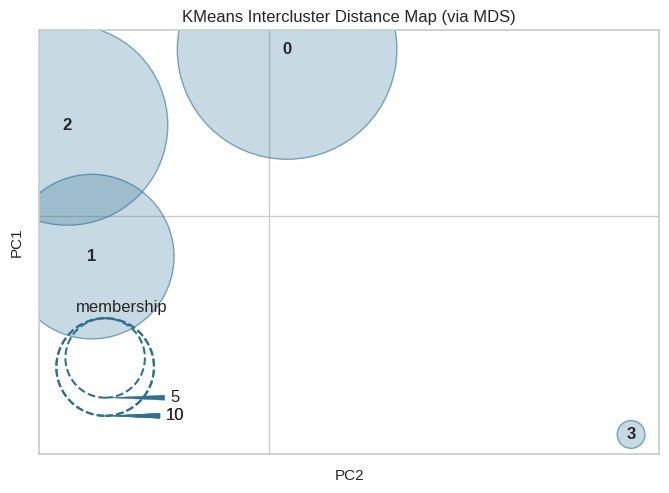

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
from yellowbrick.cluster import InterclusterDistance
inter_vis=InterclusterDistance(KMeans(4))
inter_vis.fit(scal.transform(numerical_df))
inter_vis.poof()